# IMDB Scraper

Script to scrape reviews and ratings of a movie / tvshow from IMDB.

In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
from bs4 import BeautifulSoup
import requests
import json
from matplotlib import pyplot as plt

Configuration

In [2]:
DATA_PATH = 'data.tsv'

Read tsv

In [3]:
df = pd.read_csv(DATA_PATH, sep = '\t')

In [4]:
df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1924
1,tt0000002,5.8,260
2,tt0000003,6.5,1736
3,tt0000004,5.6,175
4,tt0000005,6.2,2551


Row count

In [5]:
len(df.index)

1252779

Randomly sample data

In [6]:
sample_idxs = np.random.permutation(len(df.index))

Exclude previously mined data

In [13]:
# load all previously trained data
prev_data = {}
for i in range(28):
    with open(f'./data/ratings_{i}.pkl', 'rb') as f:
        prev_data = prev_data | pickle.load(f)
# extract existing keys
mined_tids = set(prev_data.keys())
print(len(mined_tids))

28000


## Data Mining

Mine data from the web and save to pickle file

In [14]:
SAMPLE_SIZE = 20000
SAVE_INTERVAL = 1000
REVIEWS_PER_MOVIE = 5
SAVE_LOCATION = './data/'
START_ID = 10

In [ ]:
data = {}
count = 0
save_counter = START_ID
with tqdm(total=SAMPLE_SIZE) as pbar:
    for idx in sample_idxs:
        # check if exit loop
        if count >= SAMPLE_SIZE:
            break
        # get metadata
        metadata = df.iloc[idx]
        tid, rating = metadata[0], metadata[1]
        # exclude already mined data
        if tid in mined_tids:
            continue
        # scrape reviews
        raw = None
        try:
            raw = requests.get(f'https://www.imdb.com/title/{tid}/reviews?ref_=tt_urv')
        except:
            print(f'Error while mining {tid} ...')
            continue
        soup = BeautifulSoup(raw.text, 'html.parser')
        r_text = []
        for i, r_div in enumerate(soup.findAll('div', {'class': ['content']})):
            review = r_div.find(class_ = 'text')
            if i >= REVIEWS_PER_MOVIE:
                break
            r_text.append(review.text)
        if len(r_text) == 0:
            # no review found, continue searching
            continue
        # store data
        data[tid] = (rating, ' '.join(r_text))
        count += 1
        pbar.update(1)
        # save data if interval
        if count % SAVE_INTERVAL == 0:
            # dump data
            print('saving checkpoint...')
            with open(f'{SAVE_LOCATION}ratings_{save_counter}.pkl', 'wb') as f:
                pickle.dump(data, f)
            save_counter += 1
            # clear data
            data.clear()
# save data
print('done')

  1%|█                                                                           | 277/20000 [08:44<9:03:35,  1.65s/it]

Error while mining tt13210822 ...


  1%|█                                                                           | 279/20000 [08:46<7:03:57,  1.29s/it]

Error while mining tt0209812 ...


  1%|█                                                                           | 280/20000 [08:47<6:46:41,  1.24s/it]

Error while mining tt13985888 ...


  1%|█                                                                          | 284/20000 [08:58<16:11:23,  2.96s/it]

Error while mining tt21272520 ...


  1%|█                                                                           | 287/20000 [08:58<7:38:38,  1.40s/it]

Error while mining tt6389574 ...


  5%|███▊                                                                       | 1000/20000 [29:41<7:26:15,  1.41s/it]

saving checkpoint...


  6%|████▌                                                                      | 1232/20000 [36:34<7:47:50,  1.50s/it]

Error while mining tt11957196 ...


 10%|███████▌                                                                   | 2000/20000 [59:22<5:35:50,  1.12s/it]

saving checkpoint...


 14%|██████████▏                                                              | 2797/20000 [1:21:38<8:42:41,  1.82s/it]

Error while mining tt0364904 ...


 14%|██████████▏                                                              | 2798/20000 [1:21:39<7:46:43,  1.63s/it]

Error while mining tt0027777 ...
Error while mining tt15392890 ...


 14%|██████████▏                                                              | 2808/20000 [1:21:58<9:06:50,  1.91s/it]

Error while mining tt15857336 ...
Error while mining tt0379874 ...
Error while mining tt5198068 ...
Error while mining tt0143480 ...


 15%|██████████▉                                                              | 3000/20000 [1:27:09<6:49:06,  1.44s/it]

saving checkpoint...


 20%|██████████████▌                                                          | 4000/20000 [1:55:35<5:54:25,  1.33s/it]

saving checkpoint...


 21%|███████████████▎                                                        | 4260/20000 [2:03:22<10:14:23,  2.34s/it]

Error while mining tt4586258 ...


 21%|███████████████▌                                                         | 4275/20000 [2:03:42<5:15:54,  1.21s/it]

Error while mining tt3609978 ...


 21%|███████████████▌                                                         | 4278/20000 [2:03:49<8:35:07,  1.97s/it]

Error while mining tt0520302 ...


 25%|██████████████████                                                      | 5000/20000 [2:24:50<10:59:15,  2.64s/it]

saving checkpoint...


 28%|████████████████████▋                                                    | 5671/20000 [2:44:35<6:57:58,  1.75s/it]

Error while mining tt7492172 ...


 28%|████████████████████▍                                                   | 5675/20000 [2:44:48<10:37:16,  2.67s/it]

Error while mining tt1153036 ...


 30%|█████████████████████▉                                                   | 6000/20000 [2:53:54<5:48:51,  1.50s/it]

saving checkpoint...


 35%|█████████████████████████▌                                               | 7000/20000 [3:22:34<4:56:22,  1.37s/it]

saving checkpoint...


 37%|███████████████████████████▎                                             | 7475/20000 [3:36:22<7:40:55,  2.21s/it]

Error while mining tt6854152 ...


 37%|███████████████████████████▎                                             | 7482/20000 [3:36:28<3:36:47,  1.04s/it]

Error while mining tt2033451 ...


 38%|███████████████████████████▍                                             | 7509/20000 [3:37:09<4:21:26,  1.26s/it]

Error while mining tt0320734 ...


 40%|█████████████████████████████▏                                           | 8000/20000 [3:50:32<4:41:19,  1.41s/it]

saving checkpoint...


 45%|████████████████████████████████▊                                        | 9000/20000 [4:17:33<4:14:26,  1.39s/it]

saving checkpoint...


 45%|█████████████████████████████████                                        | 9067/20000 [4:19:17<7:18:17,  2.41s/it]

Error while mining tt0075093 ...


 45%|█████████████████████████████████                                        | 9068/20000 [4:19:17<5:32:46,  1.83s/it]

Error while mining tt0425651 ...


 45%|█████████████████████████████████                                        | 9072/20000 [4:19:22<4:18:58,  1.42s/it]

Error while mining tt5588968 ...


 45%|█████████████████████████████████▏                                       | 9076/20000 [4:19:30<4:51:35,  1.60s/it]

Error while mining tt11518212 ...
Error while mining tt2736160 ...


 50%|████████████████████████████████████                                    | 10000/20000 [4:45:19<3:45:45,  1.35s/it]

saving checkpoint...


 55%|███████████████████████████████████████▌                                | 11000/20000 [5:12:46<2:55:54,  1.17s/it]

saving checkpoint...


 60%|███████████████████████████████████████████▏                            | 12000/20000 [5:38:23<4:11:09,  1.88s/it]

saving checkpoint...


 60%|███████████████████████████████████████████▏                            | 12010/20000 [5:38:35<2:49:57,  1.28s/it]

Error while mining tt21811034 ...


 60%|███████████████████████████████████████████▎                            | 12018/20000 [5:38:44<2:16:36,  1.03s/it]

Error while mining tt5860488 ...


 65%|██████████████████████████████████████████████▊                         | 13000/20000 [6:05:41<3:22:36,  1.74s/it]

saving checkpoint...


 66%|███████████████████████████████████████████████▊                        | 13265/20000 [6:13:04<4:03:49,  2.17s/it]

Error while mining tt3694902 ...
Error while mining tt1177529 ...


 70%|██████████████████████████████████████████████████▍                     | 14000/20000 [6:33:16<2:09:26,  1.29s/it]

saving checkpoint...


 75%|██████████████████████████████████████████████████████                  | 15000/20000 [7:01:02<1:42:50,  1.23s/it]

saving checkpoint...


 80%|█████████████████████████████████████████████████████████▌              | 16000/20000 [7:29:17<1:46:32,  1.60s/it]

saving checkpoint...


 85%|█████████████████████████████████████████████████████████████▏          | 17000/20000 [7:56:07<1:37:25,  1.95s/it]

saving checkpoint...


 88%|████████████████████████████████████████████████████████████████▊         | 17524/20000 [8:10:31<57:37,  1.40s/it]

Error while mining tt0789951 ...
Error while mining tt0995437 ...
Error while mining tt14441570 ...


 88%|███████████████████████████████████████████████████████████████         | 17526/20000 [8:10:36<1:17:39,  1.88s/it]

Error while mining tt3813804 ...


 88%|███████████████████████████████████████████████████████████████         | 17529/20000 [8:10:43<1:21:15,  1.97s/it]

Error while mining tt6855918 ...


 88%|███████████████████████████████████████████████████████████████         | 17531/20000 [8:10:46<1:11:17,  1.73s/it]

Error while mining tt6377538 ...


 88%|███████████████████████████████████████████████████████████████         | 17532/20000 [8:10:47<1:03:06,  1.53s/it]

Error while mining tt1041379 ...


 90%|██████████████████████████████████████████████████████████████████▌       | 18000/20000 [8:23:13<33:31,  1.01s/it]

saving checkpoint...


 94%|█████████████████████████████████████████████████████████████████████▊    | 18866/20000 [8:47:48<43:46,  2.32s/it]

Train/Dev/Test Split

In [15]:
ratio = [24,2,2]
FILE_COUNT = 28

ratio = np.cumsum(np.array(ratio))
names = ['train', 'dev', 'test']
ratings = {}
mode = 0
for i in range(FILE_COUNT):
    with open(f'{SAVE_LOCATION}ratings_{i}.pkl', 'rb') as handle:
        temp = pickle.load(handle)
        # merge
        ratings = ratings | temp
    # dump file
    if i == ratio[mode] - 1:
        with open(f'{SAVE_LOCATION}processed/data_{names[mode]}.pkl', 'wb') as f:
            pickle.dump(ratings, f)
        mode += 1
        ratings.clear()

## Data visualization

Load pickled data

In [16]:
train_data = None
dev_data = None
test_data = None
with open(f'{SAVE_LOCATION}processed/data_train.pkl', 'rb') as handle:
    train_data = pickle.load(handle)
with open(f'{SAVE_LOCATION}processed/data_dev.pkl', 'rb') as handle:
    dev_data = pickle.load(handle)
with open(f'{SAVE_LOCATION}processed/data_test.pkl', 'rb') as handle:
    test_data = pickle.load(handle)

Size of dataset

In [17]:
print(f'Dataset Size: train = {len(train_data)}, dev = {len(dev_data)}, test = {len(test_data)}')

Dataset Size: train = 24000, dev = 2000, test = 2000


Ratings distribution

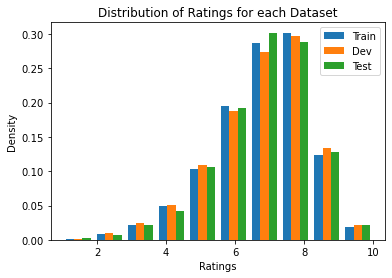

In [18]:
train_scores = []
for k, v in train_data.items():
    train_scores.append(v[0])
dev_scores = []
for k, v in dev_data.items():
    dev_scores.append(v[0])
test_scores = []
for k, v in test_data.items():
    test_scores.append(v[0])
dist = [np.array(train_scores), np.array(dev_scores), np.array(test_scores)]
plt.hist(dist, density = True, label=['Train', 'Dev', 'Test'])
plt.title('Distribution of Ratings for each Dataset')
plt.xlabel('Ratings')
plt.ylabel('Density')
plt.legend()
plt.show()

# Twitter Scraper

Script to scrape twitter posts with a specific movie hashtag

In [99]:
SAVE_LOCATION = './twitter/'
RESULTS = 50

In [100]:
hashtags = [
    (7.3, '#blackpanther2'),
    (8.4, '#TopGun'),
    (6.9, '#NopeMovie'),
    (6.3, '#ThorLoveAndThunder')
]

In [102]:
twitter_data = []
for score, hashtag in hashtags:
    bearer_token = 'TOKEN'
    def bearer_oauth(r):
        r.headers["Authorization"] = f"Bearer {bearer_token}"
        r.headers["User-Agent"] = "v2RecentSearchPython"
        return r
    params = {'query': f'{hashtag} lang:en', 'max_results': RESULTS}
    url = 'https://api.twitter.com/2/tweets/search/recent'
    res = requests.get(url, auth=bearer_oauth, params=params).json()
    data = [r['text'] for r in res['data']]
    twitter_data.append((hashtag, score, data))
with open(f'{SAVE_LOCATION}/data.pkl', 'wb') as f:
    pickle.dump(twitter_data, f)